In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd

We are using the following Housing dataset from Kaggle: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download
The dataset has 13 features, for the simple linear regression, we are considering the "area" as the critical independent feature and "price" as the dependent feature.

In [57]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Housing Dataset/Housing.csv')

In [58]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Scatterplot:
We are plotting a scatterplot to understand the relationship between the feature and the label



<Axes: xlabel='area', ylabel='price'>

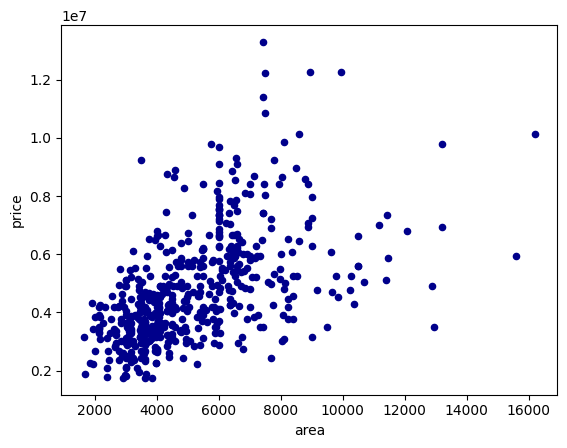

In [59]:
ax1 = df.plot.scatter( x="area", y="price", c="DarkBlue")
ax1

<Axes: xlabel='area', ylabel='price'>

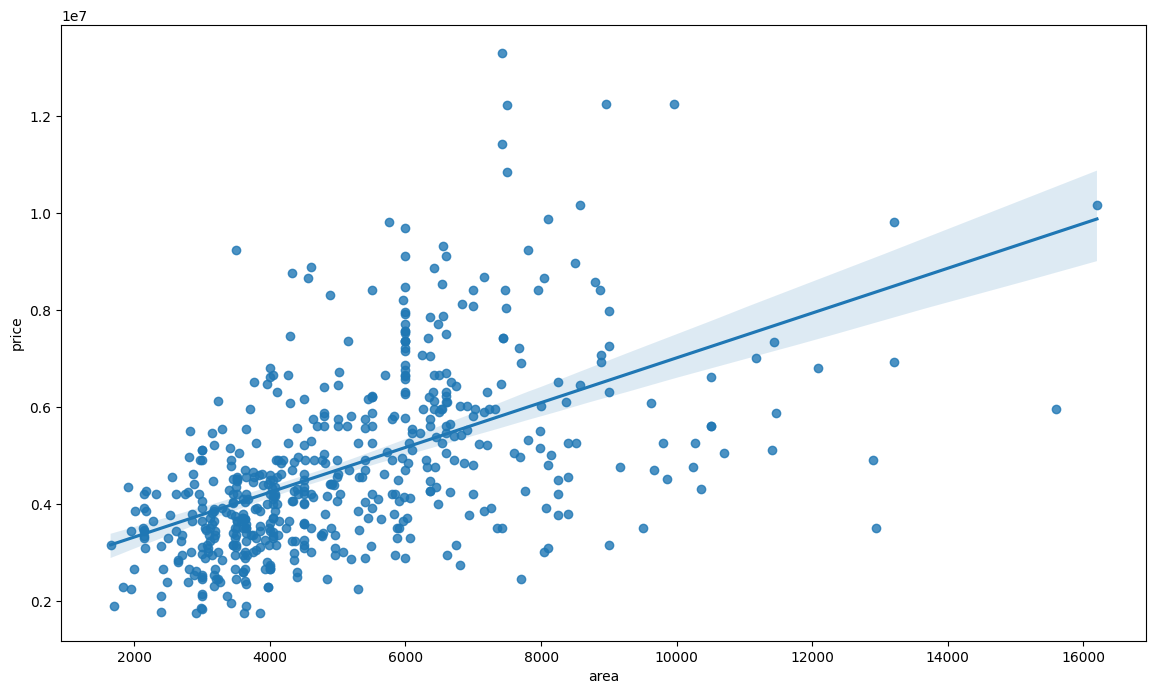

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.regplot(x="area", y="price", data=df)
#The regplot graph is used to find the relationship that exist between the area and the price of the data in the dataset. The regplot is useful in that it shows
#the relationship in a scatterplot and the linear regression line. The scatterplot is used to display the relationship between the feature and the 
# label while the regression line is to define the relationship that exist between the features.

In [61]:
#The pearsonr() is to show the correlation coefficient between the variables and the pvalue.
# The coefficient here indicates there is a moderately strong relationship as the abs(val)~0.5 that exists between the two features of the dataset
# The coefficient begin positive indicates that an increase in area directly impacts a positive increase to the price
# The pvalue is also a very low value close to 0, which indicates that the relationship that we see is not based out of random probability and 
# the relationship is statistically significant enough to be considered.
from scipy.stats import pearsonr
pearsonr(df['price'], df['area'])

PearsonRResult(statistic=0.5359973457780801, pvalue=7.388225401521874e-42)

In [62]:
#The spearmanr() coefficient displays the same relations like correlation coefficient and pvalue as in the pearsonr(). 
# The results are similar indicating a strong monotonic (increasing) relationship between price and area and the low pvalue 
# indicates that the results are not random in nature
from scipy.stats import spearmanr
spearmanr(df['price'], df['area'])

SignificanceResult(statistic=0.602858858318821, pvalue=3.1285544686153554e-55)

In [63]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [64]:
y = df['price']
X = df[['area']]

In [65]:
X

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


In [66]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [68]:
X_train

,area
261,3510
353,2856
94,6000
180,4500
192,6600
...,...
71,6000
106,5450
270,4500
435,4040


In [69]:
y_train

261    4473000
353    3780000
94     6300000
180    5215000
192    5040000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 365, dtype: int64

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [71]:
#The Coefficient of Determination or the R-squared value indicates that the price is dependent on 28% of the value change in area. This also
# means that there are other factors in play that the price depends on
coeffOfDetermination = model.score(X, y)
print(f"The Coefficient of determination is {coeffOfDetermination}")

The Coefficient of determination is 0.2872931546811469


In [72]:
# The intercept indicates the price that would exist when the area is changed to 0.
intercept = model.intercept_
print(f"The intercept is {intercept}")

The intercept is 2387308.48239643


In [73]:
#The slope is used to indicate the increase in price depending on the increase in every unit of the area.
slope = model.coef_
print(f"The slope is {slope}")

The slope is [461.97489427]


In [74]:
y_pred = model.predict(X)
print(f"The predicted response is {y_pred}")

The predicted response is [5815162.19790048 6526603.53508057 6988578.42935335 5852120.18944231
 5815162.19790048 5852120.18944231 6351053.07525691 9871301.76961552
 6129305.12600598 5043664.12446493 8485377.08679717 5159157.84803313
 5413244.03988316 4004220.61235117 5990712.65772414 5159157.84803313
 5436342.7845968  6314095.08371509 4512392.99605123 5353187.3036277
 4383040.02565485 5692738.8509182  6106206.38129234 4493914.00028032
 6452687.55199692 5408624.29094043 5159157.84803313 6487335.66906738
 6060008.89186506 4928170.40089674 5840570.81708549 5621132.74230591
 4641745.96644761 5140678.85226222 5547216.75922227 5621132.74230591
 5843804.6413454  6545082.53085148 5159157.84803313 5159157.84803313
 5413244.03988316 5325468.80997133 5380905.79728407 5159157.84803313
 5159157.84803313 5159157.84803313 5159157.84803313 5436342.7845968
 4373800.5277694  5824401.69578594 5824401.69578594 5309299.68867178
 5159157.84803313 4766479.18790126 5159157.84803313 5159157.84803313
 7672301.2

In [75]:
y_pred_formula = model.intercept_ + model.coef_ * X
print(f"The Predicted Response based on the equation is {y_pred_formula}")

The Predicted Response based on the equation is              area
0    5.815162e+06
1    6.526604e+06
2    6.988578e+06
3    5.852120e+06
4    5.815162e+06
..            ...
540  3.773233e+06
541  3.496048e+06
542  4.059658e+06
543  3.731655e+06
544  4.165912e+06

[545 rows x 1 columns]
